<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH5_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EB%B2%95(backpropagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH5_오차역전파법(backpropagation)

## 1. 단순한 계층 구현하기

In [ ]:
# coding: utf-8


class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy



In [ ]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


In [ ]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y): # 입력받은 두 값을 더 해서 반환
    out = x + y
    return out 

  def backward(self, dout): # 상류에서 내려온 미분을 그대로 하류로 흘러보냄
    dx = dout * 1
    dy = dout * 1
    return dx, dy

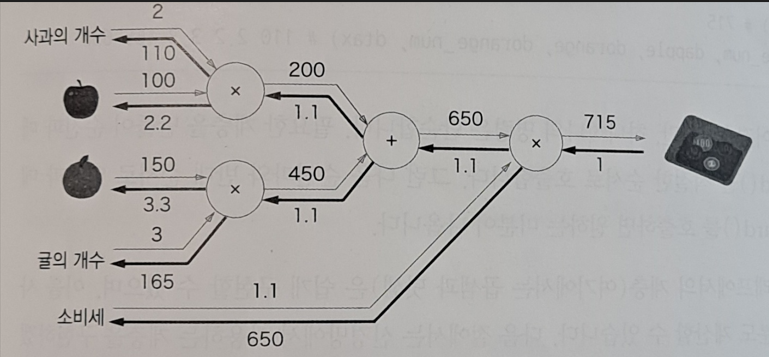

> 위 그림에 해당하는 코드 구현

In [10]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
(1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1.1, 650, 1

## 2. 활성화 함수 계층 구현하기

### 1) ReLU 계층
> 순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘립니다. 반면, 순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않습니다.

In [17]:
class Relu:
  def __init__(self):
    self.mask = None # mask라는 인스턴스 변수를 가진다.(True/False로 구성된 넘파이 배열)
  
  def forward(self, x): # 입력값이 0이하인 인덱스는 True 그 외는 False로 유지한다.
    self.mask = (x <= 0) 
    out = x.copy()
    out[self.mask]  = 0

    return out

  def backward(self, dout): # 순전파 때의 입력 값이 0이하면 역전파때의 값은 0이 돼야 한다. 
    dout[self.mask] = 0 #그래서 순전파때 만들어둔 mask를 써서 mask의 원소가 True인 곳에는 상류에서 전파된 dout을 0으로 설정한다.
    dx = dout

    return dx

In [18]:
import numpy as np
x = np.array([[1.0, -0.5],[-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [19]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


### 2) Sigmoid 계층
- sigmoid에서는 exp와 /노드가 새롭게 등장한다.
  - exp : y = exp(x) 계산을 수행
  - / : y = 1/x 계산을 수행

- 1단계
  - 역전파 때는 상류에서 흘러온 값에 -y^2(순전파의 풀력을 제곱한 후 마이너스를 붙인 값)을 곱해서 하류로 전달한다.
- 2단계
  - + 노드는 상류의 값을 여과없이 하류로 내보내는게 다이다.계산 그래프에서는 다음과 같다.
- 3단계
  - exp 노드는 y = exp(x)연산을 수행한다.
- 4단계
  - x 노드는 순전파때의 값을 서로 바꿔 곱한다. 

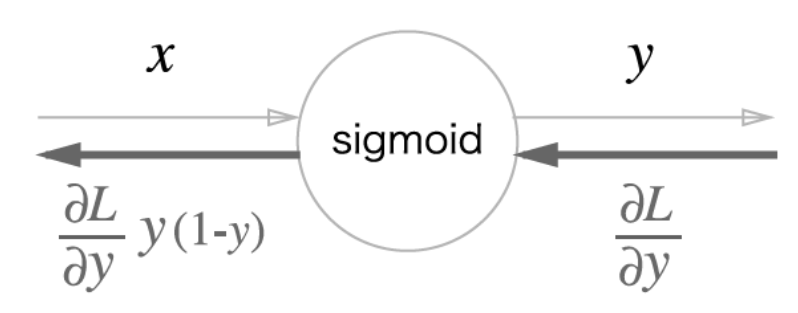

In [20]:
class Sigmoid:
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1 / (1+ np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    
    return dx

### 3) Affine계층, softmax계층 -> 일단 미뤄두기 나중에 하기

## 3. 오차역전파법 구현하기
- 오차역전파법은 기울기 산출을 할대 등장한다. 앞장에서는 이 기울기를 구하기 위해서 수치 미분을 사용했는데 수치미분은 구현하기는 쉽지만 계산이 오래걸린다.
- 오차역전파법을 사용하면 느린 수치 미분과 달리 기울기를 효과적으로 빠르게 구할 수 있다.


In [22]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict # 순서가 있는 딕셔너리로 순서가 있는 딕셔너리에 추가한 순서를 기억한다는 것이다.


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


### 오차역전파법으로 구한 기울기 검증하기

In [24]:
import sys, os
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후 그 절댓값들의 평균을 구한다.
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":"+str(diff))

W1:1.8881984367511883e-10
b1:1.0666800321336109e-09
W2:7.035716278774861e-08
b2:1.4001758211618086e-07


### 오차역전파법을 사용한 학습 구현하기

In [28]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09751666666666667 0.0974
